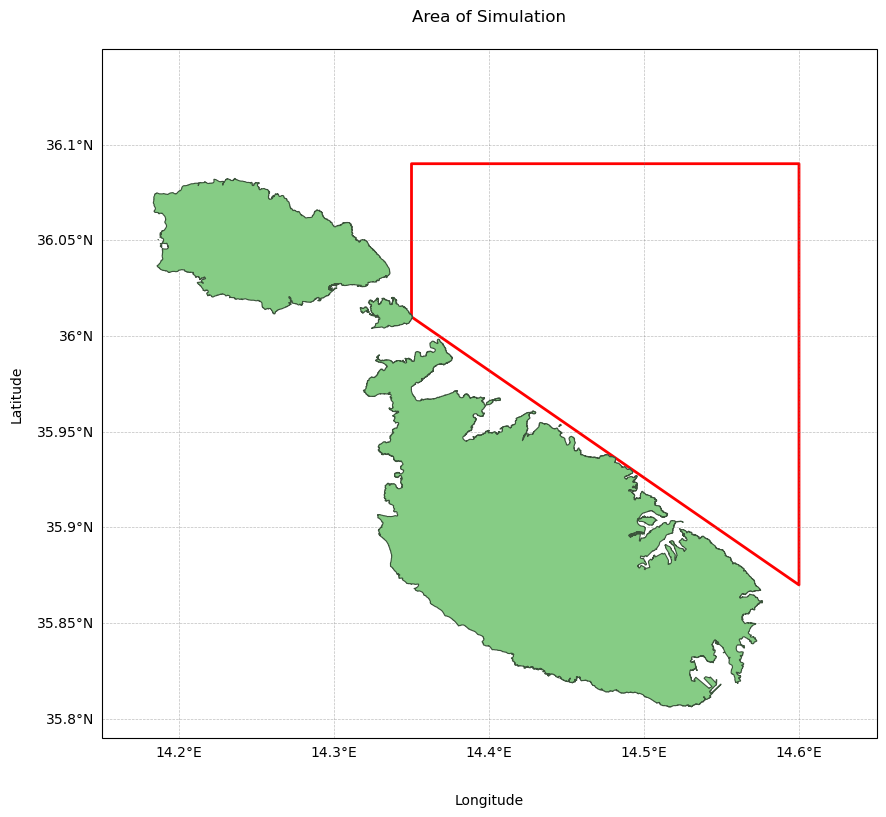

In [1]:
### First Visuslisation for the Article
### Caption: "Area Boundaries for the Simulation"

import matplotlib.pyplot as plt
import geopandas as gpd
import cartopy.crs as ccrs
from shapely.geometry import Polygon

# Path to the shapefile
shapefile_path = '../Data/land_sea_mask/MaltaCoastline.shp'

# Load the shapefile using GeoPandas and ensure it's in WGS84 CRS
gdf = gpd.read_file(shapefile_path).to_crs(epsg=4326)

# Define the vertices of a polygon to highlight a specific area on the map
polygon_coordinates = [
    (14.6, 35.87),
    (14.35, 36.01),
    (14.35, 36.09),
    (14.6, 36.09),
    (14.6, 35.87)
]
polygon_shape = Polygon(polygon_coordinates)

# Define the geographic boundaries for plotting
extent = [14.15, 14.65, 35.79, 36.15]

# Prepare the plot with a geographic (Plate Carree) projection
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent(extent)

# Plot the coastline of Malta from the shapefile using GeoPandas
gdf.plot(ax=ax, color='#86CC85', edgecolor='#3B533B', linewidth=0.8, zorder=3)

# Add the polygon to the map
ax.add_geometries([polygon_shape], ccrs.PlateCarree(), facecolor='none', edgecolor='red', linewidth=2)

# Add gridlines and labels to improve map readability
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Customize the plot appearance
plt.title("Area of Simulation", pad=20)
ax.text(-0.1, 0.50, 'Latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes)
ax.text(0.5, -0.1, 'Longitude', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes)
 
# Display the plot
plt.show()

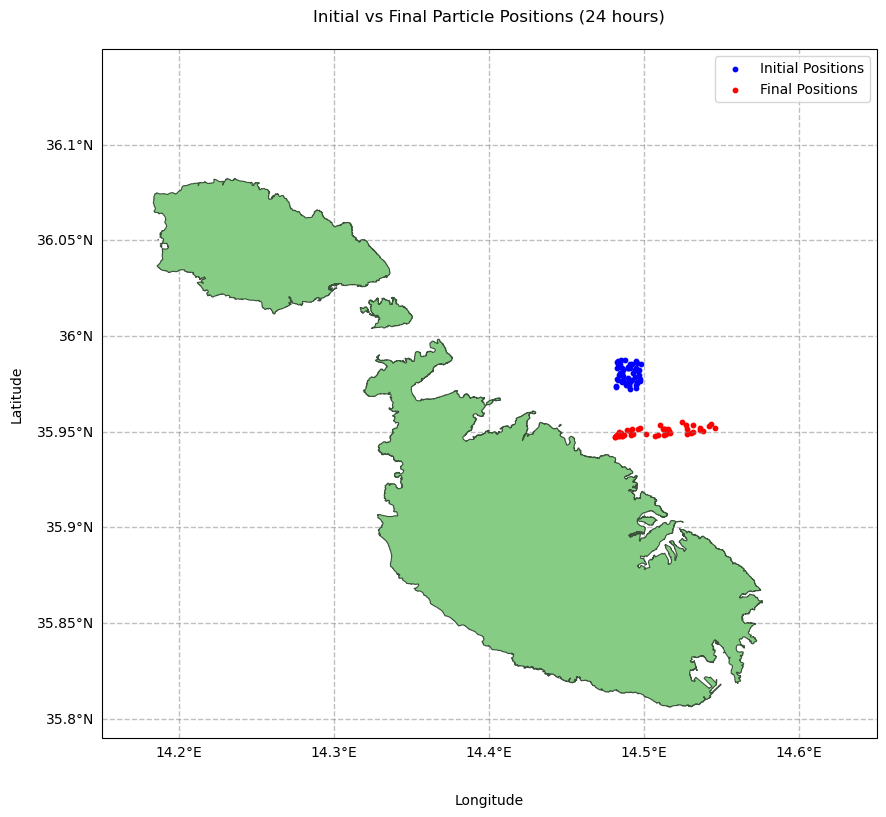

In [2]:
### Second Visuslisation for the Article
### Caption: "Debris Locations Before and After 24 hr Simulation"

import xarray as xr

# Load the shapefile using GeoPandas and ensure it's in WGS84 CRS
shapefile_path = '../Data/land_sea_mask/MaltaCoastline.shp'
gdf = gpd.read_file(shapefile_path).to_crs(epsg=4326)

# Load the predicted particle data
predicted_ds = xr.open_zarr("../Lagrangian_Output/LSTM_predicted_values.zarr")

# Calculate initial and final positions
initial_lons = predicted_ds.lon.isel(obs=0).values  # Initial longitudes
initial_lats = predicted_ds.lat.isel(obs=0).values  # Initial latitudes
final_lons = predicted_ds.lon.isel(obs=-1).values  # Final longitudes
final_lats = predicted_ds.lat.isel(obs=-1).values  # Final latitudes

# Define the geographic boundaries for the plot
extent = [14.15, 14.65, 35.79, 36.15]

# Prepare the plot with a geographic (Plate Carree) projection
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent(extent)

# Plot the coastline of Malta from the shapefile using GeoPandas
gdf.plot(ax=ax, color='#86CC85', edgecolor='#3B533B', linewidth=0.8, zorder=3)

# Plot the initial positions of the particles on the map
ax.scatter(initial_lons, initial_lats, s=10, c='blue', marker='o', transform=ccrs.PlateCarree(), label='Initial Positions')

# Plot the final positions of the particles on the map
ax.scatter(final_lons, final_lats, s=10, c='red', marker='o', transform=ccrs.PlateCarree(), label='Final Positions')

# Customize the plot appearance
ax.set_title("Initial vs Final Particle Positions (24 hours)", pad=20)
ax.text(-0.1, 0.50, 'Latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes)
ax.text(0.5, -0.1, 'Longitude', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes)
ax.legend(loc='upper right')

# Add gridlines and labels to improve map readability
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Display the plot
plt.show()

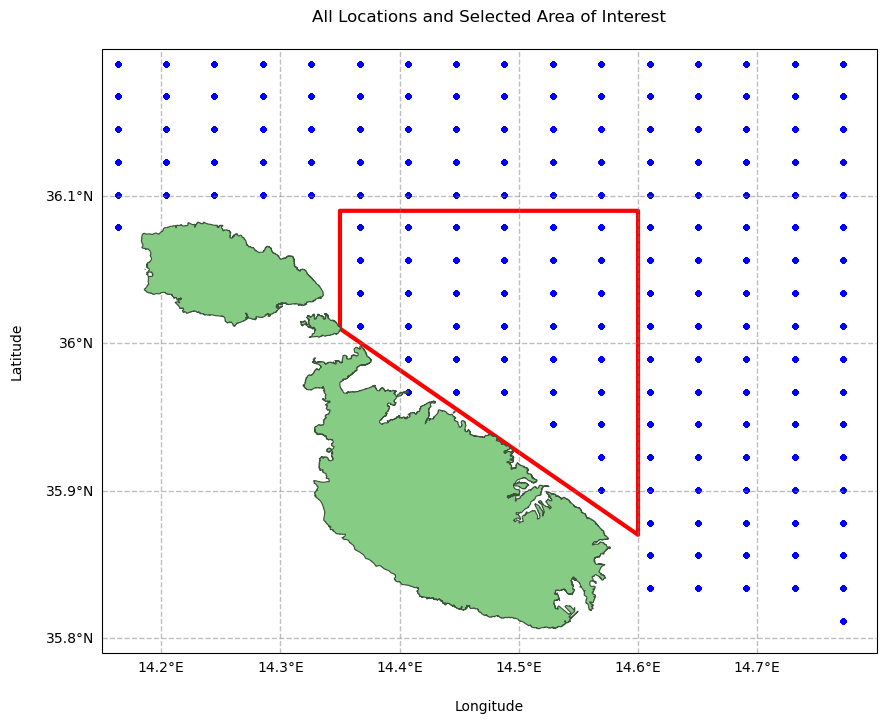

In [3]:
import pandas as pd

# Load the dataset
netcdf_file_path = "../Data/model_IO/final_SSC_Data.nc"

# Open the dataset
dataset = xr.open_dataset(netcdf_file_path)

# Convert the dataset to a pandas DataFrame and reset the index
df = dataset.to_dataframe().reset_index()

# Drop unnecessary columns from the DataFrame
df = df.drop(columns=['stdu', 'stdv', 'cov', 'velo', 'head'])

# Drop rows with NaN values in 'u' and 'v' columns
df.dropna(subset=['u', 'v'], inplace=True)

# Convert the 'time' column to datetime format
df.index = pd.to_datetime(df['time'], format='%d-%m-%Y %H:%M:%S')

# Define the boundaries for the map
boundaries = {
    'min_lon': 14.15,
    'max_lon': 14.8,
    'min_lat': 35.79,
    'max_lat': 36.2
}

# Define the vertices of a polygon to highlight a specific area on the map
polygon_coordinates = [
    (14.6, 35.87),
    (14.35, 36.01),
    (14.35, 36.09),
    (14.6, 36.09),
    (14.6, 35.87)
]

# Load the shapefile using GeoPandas
shapefile_path = '../Data/land_sea_mask/MaltaCoastline.shp'
gdf = gpd.read_file(shapefile_path).to_crs(epsg=4326)

# Prepare the plot with a geographic (Plate Carree) projection
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([boundaries['min_lon'], boundaries['max_lon'], boundaries['min_lat'], boundaries['max_lat']])

# Plot the coastline of Malta using GeoPandas
gdf.plot(ax=ax, color='#86CC85', edgecolor='#3B533B', linewidth=0.8, zorder=3)

# Plot all data points within the defined geographic boundaries
ax.scatter(df['lon'], df['lat'], s=10, color='blue', marker='o', alpha=0.5, transform=ccrs.Geodetic())

# Create and add the polygon to the map
polygon_shape = Polygon(polygon_coordinates)
ax.add_geometries([polygon_shape], ccrs.PlateCarree(), facecolor='none', edgecolor='red', linewidth=3)

# Customize the plot appearance
ax.set_title("All Locations and Selected Area of Interest", pad=20)
ax.text(-0.1, 0.50, 'Latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes)
ax.text(0.5, -0.1, 'Longitude', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes)

# Add gridlines to the map
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Display the plot
plt.show()

c:\Users\markd\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3490: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


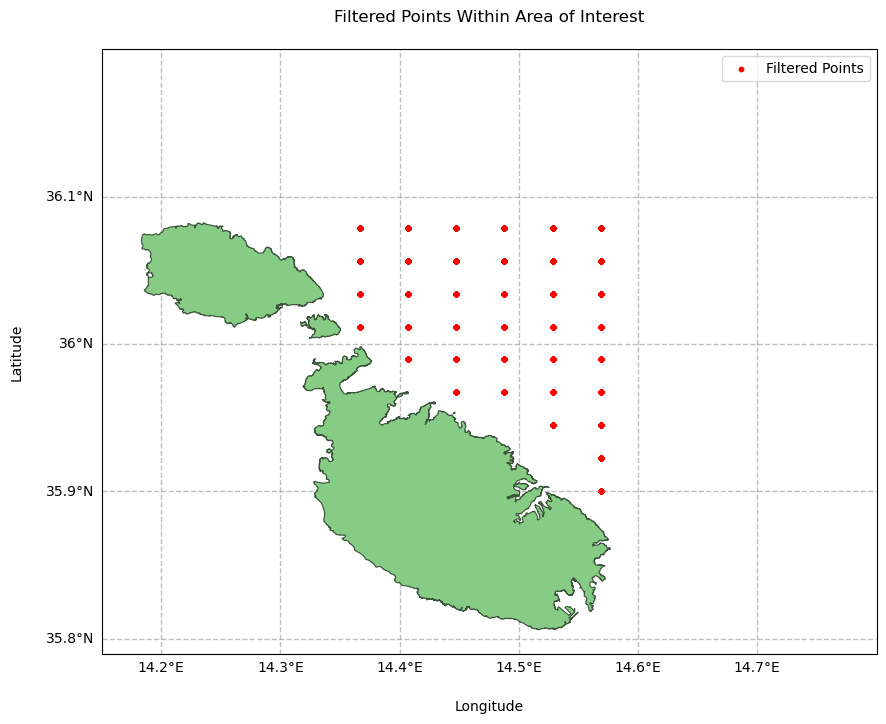

In [4]:
# Convert your polygon into a GeoDataFrame
polygon_gdf = gpd.GeoDataFrame(index=[0], geometry=[polygon_shape], crs="EPSG:4326")

# Convert the DataFrame to a GeoDataFrame
gdf_points = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat), crs="EPSG:4326")

# Use spatial join to find points within the polygon
df_inside_polygon = gpd.sjoin(gdf_points, polygon_gdf, how="inner", op='within')

# Plotting
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([boundaries['min_lon'], boundaries['max_lon'], boundaries['min_lat'], boundaries['max_lat']])

# Plot the coastline of Malta from the shapefile using GeoPandas
gdf.plot(ax=ax, color='#86CC85', edgecolor='#3B533B', linewidth=0.8, zorder=3)

# Plot the points that are located within the defined polygon in red
df_inside_polygon.plot(ax=ax, color='red', markersize=10, label='Filtered Points', transform=ccrs.Geodetic())

# Customize the plot appearance
ax.set_title("Filtered Points Within Area of Interest", pad=20)
ax.text(-0.1, 0.50, 'Latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes)
ax.text(0.5, -0.1, 'Longitude', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes)
ax.legend(loc='upper right')

# Add gridlines to the map
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Display the plot
plt.show()